<a href="https://colab.research.google.com/github/KentaEDM/Learning-Python/blob/main/Proyek_Dicoding_Kenta_Edmonda_1494037162101_854.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print (tf.__version__)

2.9.2


In [ ]:
import zipfile
import os

In [ ]:
os.mkdir('dataset1')
dataset_dir ='dataset1'

In [ ]:
target_file = '/content/drive/MyDrive/Dataset Proyek Akhir/children-vs-adults.zip'
ekstraksi = zipfile.ZipFile(target_file, 'r')

ekstraksi.extractall(dataset_dir)

ekstraksi.close()

In [ ]:
train_dir = os.path.join(dataset_dir,'/content/dataset1/test')
validation_dir= os.path.join(dataset_dir,'/content/dataset1/train')

In [ ]:
os.listdir(train_dir)
os.listdir(validation_dir)

['adults', 'children']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      shear_range=0.2,
                      fill_mode= 'nearest')
test_datagen = ImageDataGenerator(
                      rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=4,
                    class_mode='binary')
validation_generator= test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=4,
                        class_mode= 'binary')


Found 120 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data = validation_generator,
      validation_steps =5,
      verbose=5,)


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


Saving 1f89f8b4-f642-41a0-9da5-aa61a89af462.jpg to 1f89f8b4-f642-41a0-9da5-aa61a89af462 (1).jpg
1/1 [==============================] - 0s 45ms/step
1f89f8b4-f642-41a0-9da5-aa61a89af462.jpg
adults


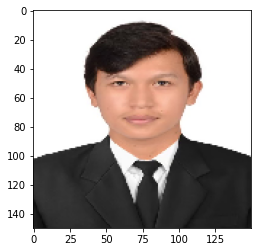

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('children')
  else:
   print('adults')

In [ ]:
#Project Akhir: Klasifikasi Gambar
#Kenta Edmonda-1494037162101-854